(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


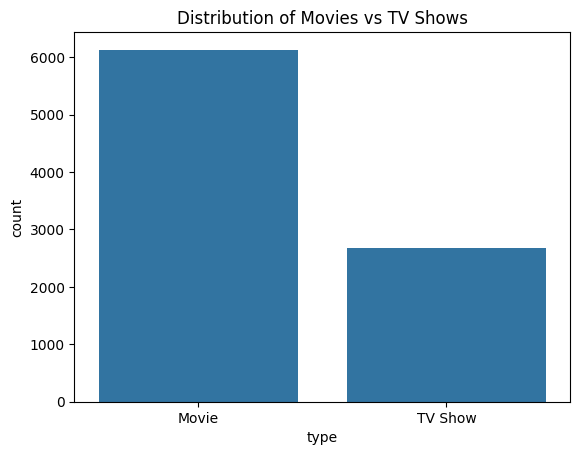

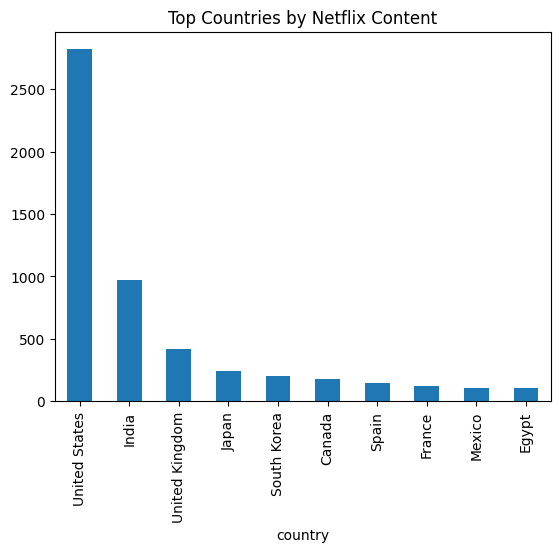

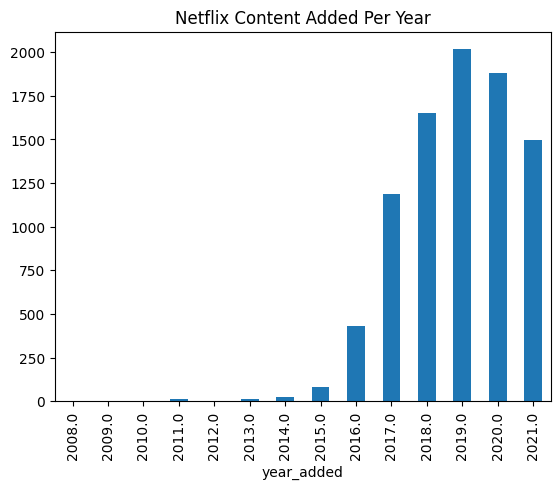

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Overview
print(df.shape)
print(df.columns)
df.head()

# Clean null values
df.isnull().sum()

# Count of shows by type
sns.countplot(x='type', data=df)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

# Top 10 countries producing content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title("Top Countries by Netflix Content")
plt.show()

# Content added per year
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Netflix Content Added Per Year")
plt.show()
# Filter the dataset into two: Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']
# Group and count by year
movies_per_year = movies_df['year_added'].value_counts().sort_index()
tvshows_per_year = tvshows_df['year_added'].value_counts().sort_index()

# Plot both on same chart
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', marker='o')
plt.plot(tvshows_per_year.index, tvshows_per_year.values, label='TV Shows', marker='s')
plt.title("Netflix Movies vs TV Shows Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Split multiple genres in 'listed_in' column
from collections import Counter

# Extract genres from Movies
all_movie_genres = movies_df['listed_in'].dropna().str.split(', ')
flat_movie_genres = [genre for sublist in all_movie_genres for genre in sublist]
top_movie_genres = Counter(flat_movie_genres).most_common(10)

# Plot
genres, counts = zip(*top_movie_genres)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres))
plt.title("Top 10 Movie Genres on Netflix")
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()

